# make plot CuT 1e-9 ENT=1e-9

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% set constants

pHv=2:0.25:10; CuT=1e-9; ENT=1e-9;

In [3]:
% make model with higher resolutions so plot line is smooth

% MODEL FOR COMPARISON
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end


In [4]:
% experimental data

pH1=[9.583 7.912 6.897 4.184 2.98];
logCuA1=[-10.7432	-9.87162	-9.71959	-9.22297	-9];
logCuB1=[-13.1081	-11.1824	-10.375		-9.36149	-9];
logCumodel1=[-14.3537	-9.94091	-9.11393	-9.0002	-9.00001]

logCumodel1,1,2,3,4,5
1,-14.3537,-9.94091,-9.11393,-9.0002,-9.00001


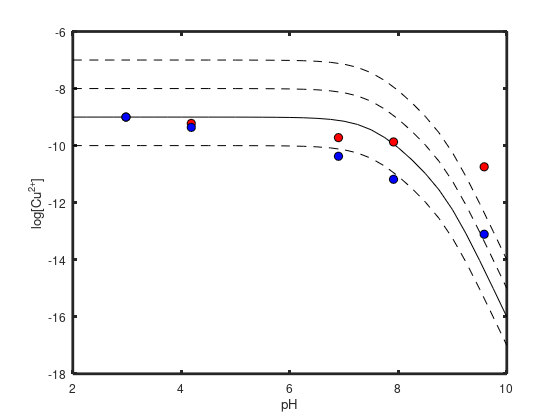

In [5]:
% make plot

plot(pHv,log10(Cuall),'k-', pHv,log10(Cuall*10),'k--', pHv,log10(Cuall./10),'k--', pHv,log10(Cuall*100),'k--')
hold on
plot(pH1,logCuA1,'ko','markerfacecolor','r')
plot(pH1,logCuB1,'ko','markerfacecolor','b')
xlabel('pH'); ylabel('log[Cu^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

In [6]:
pH1
logCuA1
logCuB1

pHv'
log10(Cuall)

pH1,1,2,3,4,5
1,9.583,7.912,6.897,4.184,2.98


logCuA1,1,2,3,4,5
1,-10.7432,-9.87162,-9.71959,-9.22297,-9


logCuB1,1,2,3,4,5
1,-13.1081,-11.1824,-10.375,-9.36149,-9


ans,1
1,2
2,2.25
3,2.5
4,2.75
5,3
6,3.25
7,3.5
8,3.75
9,4
10,4.25


ans,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
1,-9,-9,-9,-9.00001,-9.00001,-9.00002,-9.00004,-9.00007,-9.00013,-9.00023,-9.00042,-9.00074,-9.00132,-9.00235,-9.00419,-9.00749,-9.01344,-9.02425,-9.04401,-9.08015,-9.1455,-9.25969,-9.44584,-9.71885,-10.0746,-10.4975,-10.9815,-11.5496,-12.2495,-13.0936,-14.0315,-15.0101,-16.0032
